In [1]:
import numpy as np
from scipy.integrate import odeint
from forwardEULER_NN import f_Euler_NET

Instructions for updating:
non-resource variables are not supported in the long term


#### Problem Formulation

$\begin{equation}\label{eq1}
    \mathbf{u}_t = \mathcal{F}[t,\mathbf{u}, \bf{\lambda} ]
\end{equation}$

#### Where $\bf{\lambda}$ represent the parameters and $\mathbf{u}=[u,v]$


<img src="images/nn_fig.jpg" width=400 height=400 />

#### The discrete loss function of the above network is constructed using the forward Euler scheme

$\begin{equation}
\mathbf{\hat{u}}_{i} = \mathbf{\hat{u}}_{i-1} + \partial t \cdot \mathcal{N}[t,\mathbf{\hat{u}}_{i-1};\theta], \quad \partial t =\frac{T}{K}, K \in \mathbf{R}^{+}
\end{equation}$

#### The predicted solution are obtained as follows

$\begin{equation}
\mathbf{u}^{pred} = odeint(\mathcal{N}, (u(0),v(0)), tspan)
\end{equation}$


#### We learn the dynamics of the FitzHugh-Nagumo Equations below

$\begin{equation} \label{fhn_ode}
\begin{split}
\frac{d u}{d t}  &= \frac{1}{c}(u-\frac{1}{3}u^3-v) \\
\frac{d v}{d t}  &= c(u-av+b)
\end{split}
\end{equation}$

In [2]:
# generate data
# du/dt = (1/c)*(u-(1/3)*u^3-v)
# dv/dt = c*(u-a*v+b)

def f(x,t):
    c = 0.3
    a = 0.5
    b = 0.75
    
    f1 = (1/c)*(x[0] - (1/3.0)*x[0]**3 - x[1])
    f2 = c*(x[0] - a*x[1] + b)
    f = np.array([f1,f2])
    return f

In [3]:
def modelFHN(nn,delT, layers):
    t_star = np.arange(0,15,delT)
    x0 = np.array([2.0, -2.0]) # initial condition
    X_star = odeint(f, x0, t_star) # solve ODE
    noise = nn #0.01
    skip = 1
    dt = t_star[skip] - t_star[0]
    X_train = X_star[0::skip,:]
    X_train = X_train + noise*X_train.std(0)*np.random.randn(X_train.shape[0], X_train.shape[1])
    X_train = np.reshape(X_train, (1,X_train.shape[0],X_train.shape[1]))
    model = f_Euler_NET(dt, X_train, layers)
    N_Iter = 5000 #30000
    model.train(N_Iter)
    
    def learned_f(x,t):
        learnedf = model.predict_f(x[None,:])
        return learnedf.flatten()
    
    learned_X_star = odeint(learned_f, x0, t_star)
    return t_star,learned_X_star, X_star

#### 1 hidden layer, noise free, delT=0.01

In [4]:
# 1 hidden layers

layer1=[2, 32, 2]
layer2=[2, 64, 2]
layer3=[2, 128, 2]
layer4=[2, 256, 2]

In [6]:
# generating pretrained models
# uncomment the following lines

# tt,learned1_X_star,X1_star=modelFHN(0.00,0.01,layer1)
# tt,learned2_X_star,X2_star=modelFHN(0.00,0.01,layer2)
# tt,learned3_X_star,X3_star=modelFHN(0.00,0.01,layer3)
# tt,learned4_X_star,X4_star=modelFHN(0.00,0.01,layer4)

In [7]:
import matplotlib.pyplot as plt

#### 1 hidden layer, 32 neurons

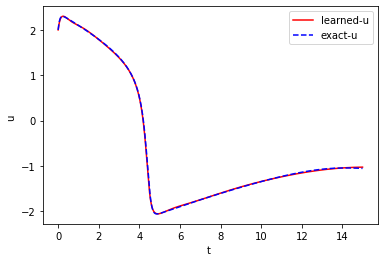

In [8]:
plt.plot(tt,learned1_X_star[:,0],'-r')
plt.plot(tt,X1_star[:,0],'--b')
plt.ylabel('u ')
plt.xlabel('t ')
plt.legend(['learned-u','exact-u'])

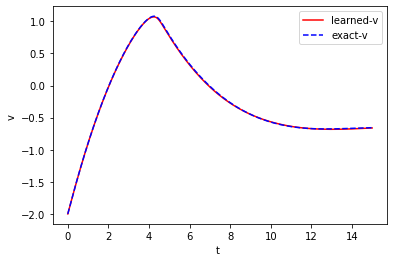

In [9]:
plt.plot(tt,learned1_X_star[:,1],'-r')
plt.plot(tt,X1_star[:,1],'--b')
plt.ylabel('v ')
plt.xlabel('t ')
plt.legend(['learned-v','exact-v'])

In [10]:
mse1a = np.sqrt((np.square(learned1_X_star[:,0]-X1_star[:,0])))
print("no noise, delta=0.01")
print("mse_1layer_32, u   "+str(np.mean(mse1a)))

no noise, delta=0.01
mse_1layer_32, u   0.009809475290640456


In [11]:
mse1b = np.sqrt((np.square(learned1_X_star[:,1]-X1_star[:,1])))
print("no noise, delta=0.01")
print("mse_1layer_32, v   "+str(np.mean(mse1b)))

no noise, delta=0.01
mse_1layer_32, v   0.00566264970007073


#### 1 hidden layer, 64 neurons

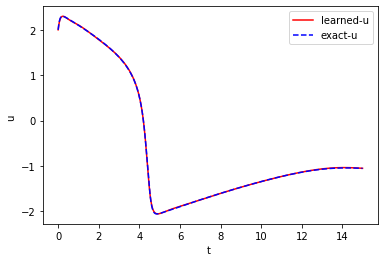

In [12]:
plt.plot(tt,learned2_X_star[:,0],'-r')
plt.plot(tt,X2_star[:,0],'--b')
plt.ylabel('u ')
plt.xlabel('t ')
plt.legend(['learned-u','exact-u'])

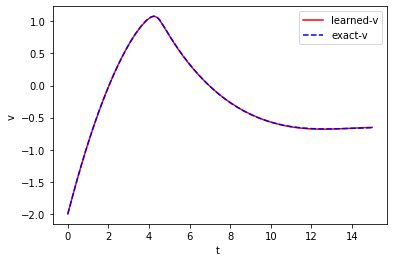

In [13]:
plt.plot(tt,learned2_X_star[:,1],'-r')
plt.plot(tt,X2_star[:,1],'--b')
plt.ylabel('v ')
plt.xlabel('t ')
plt.legend(['learned-v','exact-v'])

In [14]:
mse2a = np.sqrt((np.square(learned2_X_star[:,0]-X2_star[:,0])))
print("no noise, delta=0.01")
print("mse_1layer_64, u   "+str(np.mean(mse2a)))

no noise, delta=0.01
mse_1layer_64, u   0.0036463956491802354


In [15]:
mse2b = np.sqrt((np.square(learned2_X_star[:,1]-X2_star[:,1])))
print("no noise, delta=0.01")
print("mse_1layer_64, v   "+str(np.mean(mse2b)))

no noise, delta=0.01
mse_1layer_64, v   0.0027966554144605127


#### 1 hidden layer, 128 neurons

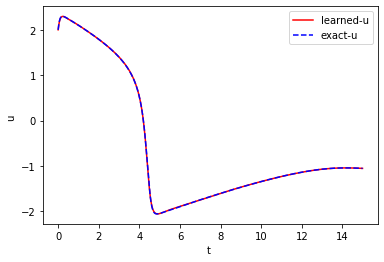

In [16]:
plt.plot(tt,learned3_X_star[:,0],'-r')
plt.plot(tt,X3_star[:,0],'--b')
plt.ylabel('u ')
plt.xlabel('t ')
plt.legend(['learned-u','exact-u'])

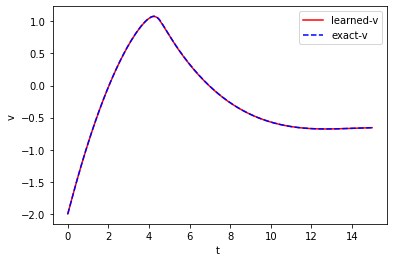

In [17]:
plt.plot(tt,learned3_X_star[:,1],'-r')
plt.plot(tt,X3_star[:,1],'--b')
plt.ylabel('v ')
plt.xlabel('t ')
plt.legend(['learned-v','exact-v'])

In [18]:
mse3a = np.sqrt((np.square(learned3_X_star[:,0]-X3_star[:,0])))
print("no noise, delta=0.01")
print("mse_1layer_128, u   "+str(np.mean(mse3a)))

no noise, delta=0.01
mse_1layer_128, u   0.001983132879120881


In [19]:
mse3b = np.sqrt((np.square(learned3_X_star[:,1]-X3_star[:,1])))
print("no noise, delta=0.01")
print("mse_1layer_128, v   "+str(np.mean(mse3b)))

no noise, delta=0.01
mse_1layer_128, v   0.001607632024254819


#### 1 hidden layer, 256 neurons

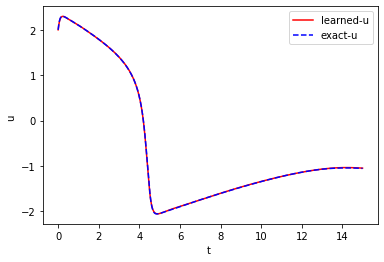

In [20]:
plt.plot(tt,learned4_X_star[:,0],'-r')
plt.plot(tt,X4_star[:,0],'--b')
plt.ylabel('u ')
plt.xlabel('t ')
plt.legend(['learned-u','exact-u'])

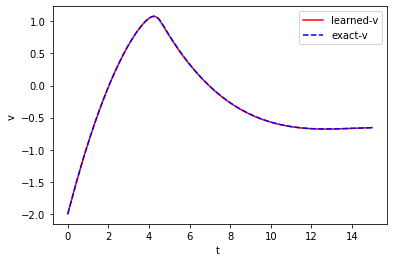

In [21]:
plt.plot(tt,learned4_X_star[:,1],'-r')
plt.plot(tt,X4_star[:,1],'--b')
plt.ylabel('v ')
plt.xlabel('t ')
plt.legend(['learned-v','exact-v'])

In [22]:
mse4a = np.sqrt((np.square(learned4_X_star[:,0]-X4_star[:,0])))
print("no noise, delta=0.01")
print("mse_1layer_256, u   "+str(np.mean(mse4a)))

no noise, delta=0.01
mse_1layer_256, u   0.0032363307415316823


In [23]:
mse4b = np.sqrt((np.square(learned4_X_star[:,1]-X4_star[:,1])))
print("no noise, delta=0.01")
print("mse_1layer_256, v   "+str(np.mean(mse4b)))

no noise, delta=0.01
mse_1layer_256, v   0.002358937795116714


#### 2 hidden layers, 1% noise, 32 neurons

In [24]:
layer11=[2, 32, 32, 2];

In [26]:
# generating pretrained models
# uncomment the following lines

# tt,learned11_X_star,X11_star=modelFHN(0.01,0.01,layer11)

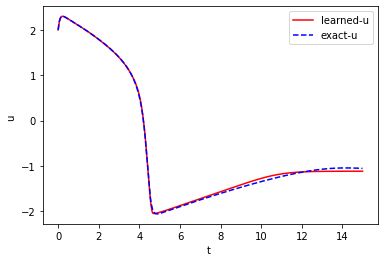

In [27]:
plt.plot(tt,learned11_X_star[:,0],'-r')
plt.plot(tt,X1_star[:,0],'--b')
plt.ylabel('u ')
plt.xlabel('t ')
plt.legend(['learned-u','exact-u'])

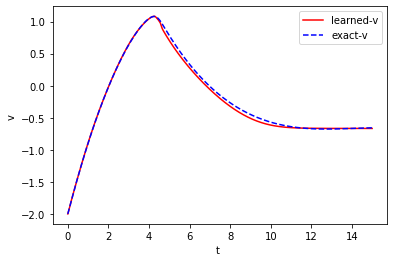

In [28]:
plt.plot(tt,learned11_X_star[:,1],'-r')
plt.plot(tt,X1_star[:,1],'--b')
plt.ylabel('v ')
plt.xlabel('t ')
plt.legend(['learned-v','exact-v'])

In [29]:
mse11a = np.sqrt((np.square(learned11_X_star[:,0]-X1_star[:,0])))
print("1% noise, delta=0.01")
print("mse_2layer_32, u   "+str(np.mean(mse11a)))

1% noise, delta=0.01
mse_2layer_32, u   0.032200037208489476


In [30]:
mse11b = np.sqrt((np.square(learned11_X_star[:,1]-X1_star[:,1])))
print("1% noise, delta=0.01")
print("mse_2layer_32, v   "+str(np.mean(mse11b)))

1% noise, delta=0.01
mse_2layer_32, v   0.02588487333582546


#### 2 hidden layers, 2% noise, 32 neurons

In [32]:
# generating pretrained models
# uncomment the following lines

# tt,learned12_X_star,X12_star=modelFHN(0.02,0.01,layer11)

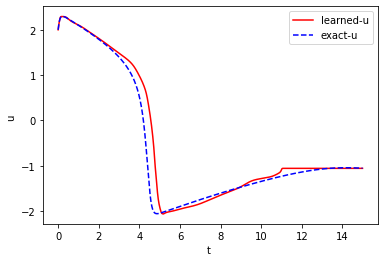

In [33]:
plt.plot(tt,learned12_X_star[:,0],'-r')
plt.plot(tt,X1_star[:,0],'--b')
plt.ylabel('u ')
plt.xlabel('t ')
plt.legend(['learned-u','exact-u'])

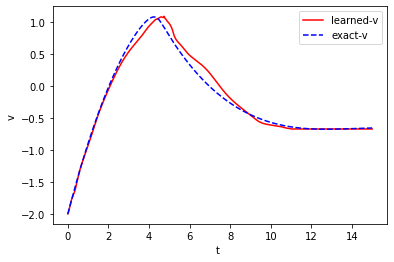

In [34]:
plt.plot(tt,learned12_X_star[:,1],'-r')
plt.plot(tt,X1_star[:,1],'--b')
plt.ylabel('v ')
plt.xlabel('t ')
plt.legend(['learned-v','exact-v'])

In [35]:
mse12a = np.sqrt((np.square(learned12_X_star[:,0]-X1_star[:,0])))
print("2% noise, delta=0.01")
print("mse_2layer_32, u   "+str(np.mean(mse12a)))

2% noise, delta=0.01
mse_2layer_32, u   0.1242462217325387


In [36]:
mse12b = np.sqrt((np.square(learned12_X_star[:,1]-X1_star[:,1])))
print("1% noise, delta=0.01")
print("mse_2layer_32, v   "+str(np.mean(mse11b)))

1% noise, delta=0.01
mse_2layer_32, v   0.02588487333582546


#### 2 hidden layers, 5% noise, 32 neurons

In [38]:
# generating pretrained models
# uncomment the following lines

# tt,learned15_X_star,X15_star=modelFHN(0.05,0.01,layer11)

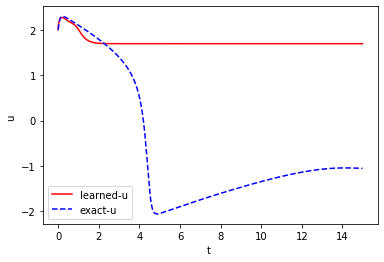

In [39]:
plt.plot(tt,learned15_X_star[:,0],'-r')
plt.plot(tt,X1_star[:,0],'--b')
plt.ylabel('u ')
plt.xlabel('t ')
plt.legend(['learned-u','exact-u'])

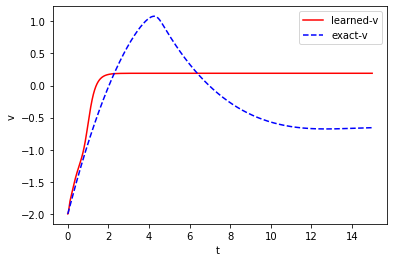

In [40]:
plt.plot(tt,learned15_X_star[:,1],'-r')
plt.plot(tt,X1_star[:,1],'--b')
plt.ylabel('v ')
plt.xlabel('t ')
plt.legend(['learned-v','exact-v'])